## Introdução

Este trabalho extensionista consiste em coleta, preparação e análise de dados governamentais abertos
disponíveis através do DATASUS.

A base de dados escolhida foi: **Mortalidade – desde 1996 pela CID-10 – Óbitos por causas externas**.

Os dados disponíveis são oriundos do Sistema de Informações sobre Mortalidade (SIM), sistema este gerido pelo Departamento de Análise de Situação de Saúde, da Secretaria de Vigilância em Saúde, em conjunto com as Secretarias Estaduais e Municipais de Saúde.

A CID-10 é a Classificação Internacional de Doenças e Problemas Relacionados à Saúde, que está em sua décima versão. É um sistema de categorias no qual as doenças são classificadas substituindo seus nomes por códigos alfanuméricos. Essa classificação permite o registro, análise, comparação e interpretação sistemática da ocorrência das doenças e dos registros de mortalidade relacionados a elas

As categorias CID-10 relacionadas à mortes por arma de fogo que utilizamos foram:

- **W33:** Rifle, espingarda e armas de fogo de maior tamanho
- **W34:** Projéteis de outras armas de fogo e das não especificadas - residência
- **X72:** Lesão autoprovocada intencionalmente por disparo de arma de fogo de mão
- **X74:** Lesão autoprovocada intencionalmente por disparo de outra arma de fogo e de arma de fogo não especificada
- **X93:** Agressão por meio de disparo de arma de fogo de mão
- **X94:** Agressão por meio de disparo de espingarda, carabina ou arma de fogo de maior calibre
- **X95:** Agressão por meio de disparo de outra arma de fogo ou de arma não especificada
- **Y23:** Disparo de fuzil, carabina e arma de fogo de maior calibre, intenção não determinada
- **Y24:** Disparo de outra arma de fogo e de arma de fogo não especificada, intenção não determinada

O objetivo desta análise é entender um pouco sobre a mortalidade causada por armas de fogo no país.


### Importando as Bibliotecas

A célula abaixo servirá apenas para instalar e importar as bibliotecas utilizadas nesta análise.

In [356]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install geopandas

32178.27s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Note: you may need to restart the kernel to use updated packages.
32184.44s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Note: you may need to restart the kernel to use updated packages.
32190.59s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Note: you may need to restart the kernel to use updated packages.
32196.61s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Note: you may need to restart the kernel to use updated packages.


In [357]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os

### Definição de Variáveis

A célula abaixo servirá para definirmos algumas variáveis padrão que serão utilizadas durante a análise.

In [358]:
dataset_folder = os.path.join('datasets')

regiao_naoativa_ocorrencia_2021 = os.path.join(dataset_folder, '2021-REGIAO-NAO_ATIVA-OCORRENCIA.csv')
regiao_faixaetaria_ocorrencia_2021 = os.path.join(dataset_folder, '2021-REGIAO-FAIXA-ETARIA-OCORRENCIA.csv')
regiao_sexo_ocorrencia_2021 = os.path.join(dataset_folder, '2021-REGIAO-SEXO-OCORRENCIA.csv')
regiao_cor_raca_2021 = os.path.join(dataset_folder, '2021-REGIAO-COR_RACA-OCORRENCIA.csv')

total_regiao_na = os.path.join(dataset_folder, 'TOTAL_REGIAO_NA.csv')

datasets_2021 = [regiao_naoativa_ocorrencia_2021, regiao_faixaetaria_ocorrencia_2021, regiao_sexo_ocorrencia_2021, regiao_cor_raca_2021]
datasets_list = []

## Visualização e Preparação dos Dados

A base de dados nos permite utilizar apenas **uma** coluna ativa ao exportar os dados. Portanto, teremos que exportar mais de um arquivo para poder analisar os dados com sob a perspectiva de outros filtros.

#### Mortalidade por Região

Primeiro, vamos fazer uma análise mais mais atual (2021) e por Região:
- Norte
- Nordeste
- Sudeste
- Sul
- Centro

### Mortalidade por Região (sem sub-categoria)

In [359]:
regiao_na = pd.read_csv(regiao_naoativa_ocorrencia_2021)
regiao_na

,Região,Óbitos_p/Ocorrênc
0,Região Norte,4492
1,Região Nordeste,16862
2,Região Sudeste,8086
3,Região Sul,3510
4,Região Centro-Oeste,2202
5,Total,35152


In [360]:
regiao_na[regiao_na['Região'] == 'Região Sul']['Óbitos_p/Ocorrênc']

3    3510
Name: Óbitos_p/Ocorrênc, dtype: int64

### Mortalidade por Região e Faixa Etária

In [361]:
regiao_faixa_etaria = pd.read_csv(regiao_faixaetaria_ocorrencia_2021)
regiao_faixa_etaria

,Região,Menor 1 ano,1 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos,80 anos e mais,Idade ignorada,Total
0,Região Norte,3,3,6,41,588,2015,1012,466,216,66,28,7,41,4492
1,Região Nordeste,3,17,13,121,2484,7232,3923,1802,729,305,100,25,108,16862
2,Região Sudeste,1,4,8,55,1062,3090,1879,1090,461,217,77,28,114,8086
3,Região Sul,-,2,1,16,389,1257,968,443,245,112,38,25,14,3510
4,Região Centro-Oeste,-,-,1,14,303,856,520,274,142,49,24,9,10,2202
5,Total,7,26,29,247,4826,14450,8302,4075,1793,749,267,94,287,35152


#### Retirando Valores Não Númericos

Como pode ser visto na visualização anterior, quando um estado não possui morte em uma determinada faixa etária, um caractére "-" é colocado como valor. Como queremos trabalhar apenas com números, iremos substituir este caractér pelo valor zero (0).

In [362]:
regiao_faixa_etaria.replace('-', 0, inplace=True)

In [363]:
regiao_faixa_etaria

,Região,Menor 1 ano,1 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos,80 anos e mais,Idade ignorada,Total
0,Região Norte,3,3,6,41,588,2015,1012,466,216,66,28,7,41,4492
1,Região Nordeste,3,17,13,121,2484,7232,3923,1802,729,305,100,25,108,16862
2,Região Sudeste,1,4,8,55,1062,3090,1879,1090,461,217,77,28,114,8086
3,Região Sul,0,2,1,16,389,1257,968,443,245,112,38,25,14,3510
4,Região Centro-Oeste,0,0,1,14,303,856,520,274,142,49,24,9,10,2202
5,Total,7,26,29,247,4826,14450,8302,4075,1793,749,267,94,287,35152


#### Retirando Dados Desnecessários

A coluna "Idade ignorada" não será importante para a nossa análise, portanto, iremos remove-la do nosso *dataset* e vamos recalcular a coluna "Total".

**Entretanto, como usaremos outros *datasets* com outros filtros, devemos propagar as mudanças deste para os outros.**

In [364]:
def drop_and_replace(df, column_to_drop):
    df.replace('-', 0)
    dropped_column = None
    if column_to_drop:
        dropped_column = df[column_to_drop]
        df.drop(columns=[column_to_drop], inplace=True)

        df['Total'] = df['Total'] - dropped_column

    return df, dropped_column

regiao_faixa_etaria, dropped_rfe = drop_and_replace(regiao_faixa_etaria, 'Idade ignorada')
datasets_list.append((regiao_faixa_etaria, dropped_rfe))
regiao_faixa_etaria

,Região,Menor 1 ano,1 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos,80 anos e mais,Total
0,Região Norte,3,3,6,41,588,2015,1012,466,216,66,28,7,4451
1,Região Nordeste,3,17,13,121,2484,7232,3923,1802,729,305,100,25,16754
2,Região Sudeste,1,4,8,55,1062,3090,1879,1090,461,217,77,28,7972
3,Região Sul,0,2,1,16,389,1257,968,443,245,112,38,25,3496
4,Região Centro-Oeste,0,0,1,14,303,856,520,274,142,49,24,9,2192
5,Total,7,26,29,247,4826,14450,8302,4075,1793,749,267,94,34865


### Mortalidade por Região e Sexo

In [365]:
regiao_sexo = pd.read_csv(regiao_sexo_ocorrencia_2021)
regiao_sexo

,Região,Masc,Fem,Ign,Total
0,Região Norte,4236,249,7,4492
1,Região Nordeste,15871,987,4,16862
2,Região Sudeste,7645,429,12,8086
3,Região Sul,3235,273,2,3510
4,Região Centro-Oeste,2059,141,2,2202
5,Total,33046,2079,27,35152


In [366]:
regiao_faixa_etaria['Total'].sum(), regiao_sexo['Total'].sum()

(69730, 70304)

#### Retirando Dados Desnecessários

A coluna "Ign" identifica mortes por arma de fogo em que o sexo foi ignorado ou não registrado. Novamente, essa coluna não será importante para a nossa análise, portanto, iremos remove-la do nosso *dataset* e vamos recalcular a coluna "Total".

In [367]:
regiao_sexo, dropped_rs = drop_and_replace(regiao_sexo, 'Ign')
datasets_list.append((regiao_sexo, dropped_rs))
regiao_sexo

,Região,Masc,Fem,Total
0,Região Norte,4236,249,4485
1,Região Nordeste,15871,987,16858
2,Região Sudeste,7645,429,8074
3,Região Sul,3235,273,3508
4,Região Centro-Oeste,2059,141,2200
5,Total,33046,2079,35125


### Mortalidade por Região e Cor/Raça

In [368]:
regiao_cor_raca = pd.read_csv(regiao_cor_raca_2021)
regiao_cor_raca

,Região,Branca,Preta,Amarela,Parda,Indígena,Ignorado,Total
0,Região Norte,336,175,10,3856,42,73,4492
1,Região Nordeste,1396,1221,13,13975,25,232,16862
2,Região Sudeste,2549,1096,14,4271,5,151,8086
3,Região Sul,2399,255,6,807,5,38,3510
4,Região Centro-Oeste,516,151,4,1499,12,20,2202
5,Total,7196,2898,47,24408,89,514,35152


#### Retirando Dados Desnecessários

A coluna "Ignorado" identifica mortes por arma de fogo em que o a cor/raça foi ignorado ou não registrado. Novamente, essa coluna não será importante para a nossa análise, portanto, iremos remove-la do nosso *dataset* e vamos recalcular a coluna "Total".

In [369]:
regiao_cor_raca, dropped_rcr = drop_and_replace(regiao_cor_raca, 'Ignorado')
datasets_list.append((regiao_cor_raca, dropped_rcr))
regiao_cor_raca

,Região,Branca,Preta,Amarela,Parda,Indígena,Total
0,Região Norte,336,175,10,3856,42,4419
1,Região Nordeste,1396,1221,13,13975,25,16630
2,Região Sudeste,2549,1096,14,4271,5,7935
3,Região Sul,2399,255,6,807,5,3472
4,Região Centro-Oeste,516,151,4,1499,12,2182
5,Total,7196,2898,47,24408,89,34638


### Padronização

Como fizemos mudanças no conjunto de dados de 2021, devemos propagar estas mudanças para o cálculo do total de óbitos para este ano.

In [370]:
dfs = []
for dt in datasets_2021:
    df = pd.read_csv(dt)
    drop_and_replace

In [371]:
i = 0
for _, dropped in datasets_list:
    for dataset, _ in datasets_list[:i] + datasets_list[i+1:]:
        dataset['Total'] = dataset['Total'] - dropped
    i+=1

regiao_faixa_etaria = datasets_list[0][0]
regiao_sexo = datasets_list[1][0]
regiao_cor_raca = datasets_list[2][0]

regiao_faixa_etaria['Total'][5], regiao_sexo['Total'][5], regiao_cor_raca['Total'][5]

(34324, 34324, 34324)

## Análise dos Dados

Agora que sabemos o que encontrar no conjunto de dados, podemos analisá-lo para retirar algumas informações.

### Qual a categoria CID-10 com maior número de óbitos desde 1996?

In [372]:
total_categoria = pd.read_csv(os.path.join(dataset_folder, 'TOTAL-CATEGORIA-OCORRENCIA.csv'))
total_categoria

,Categoria CID10,Óbitos_p/Ocorrênc
0,"W33 - Rifle, espingarda e armas de fogo de mai...",767
1,W34 - Projéteis de outras armas de fogo e das ...,6386
2,X72 - Lesão autoprovocada intencionalmente por...,7070
3,X74 - Lesão autoprovocada intencionalmente por...,21587
4,X93 - Agressão por meio de disparo de arma de ...,69913
5,X94 - Agressão por meio de disparo de espingar...,6378
6,X95 - Agressão por meio de disparo de outra ar...,836790
7,"Y23 - Disparo de fuzil, carabina e arma de fog...",261
8,Y24 - Disparo de outra arma de fogo e de arma ...,36493
9,Total,985645


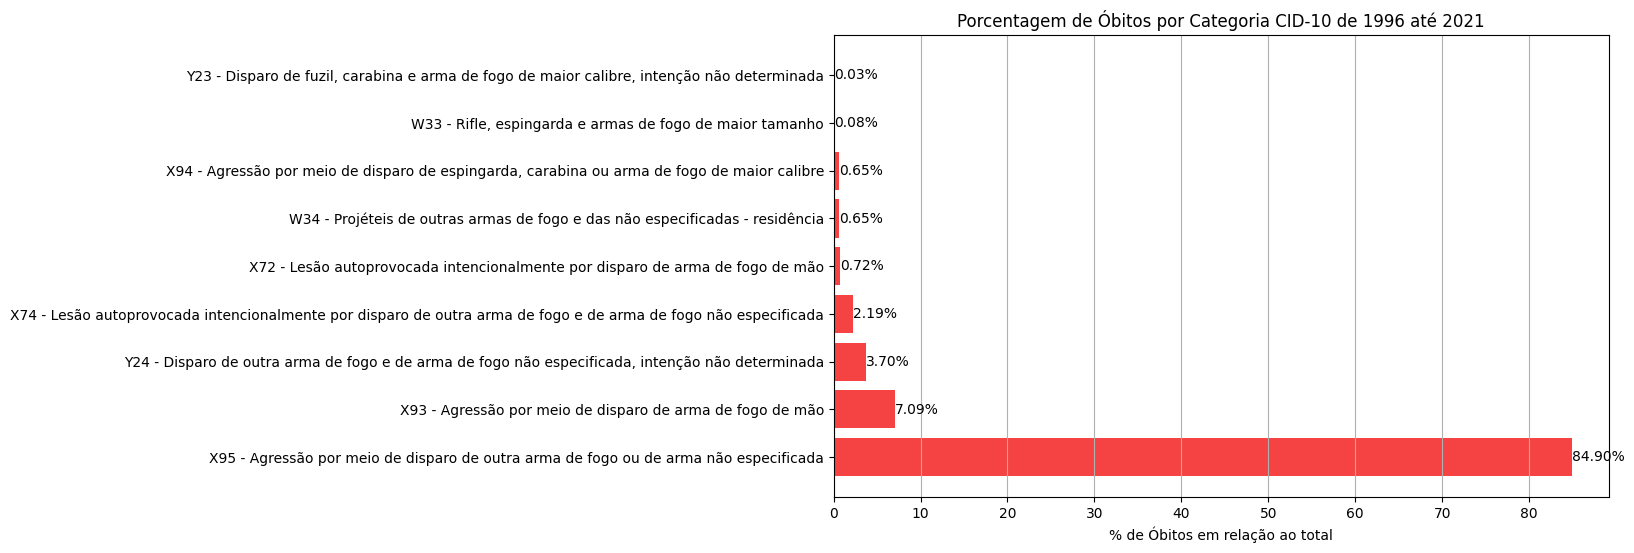

In [373]:
def plot_categoria(df, titulo='Porcentagem de Óbitos por Categoria CID-10 de 1996 até 2021'):
    df_to_plot = df.copy()
    df_to_plot = df_to_plot[df_to_plot['Categoria CID10'] != 'Total']
    total_obitos = df_to_plot["Óbitos_p/Ocorrênc"].sum()
    df_to_plot.loc[:, "% Óbitos"] = (df_to_plot["Óbitos_p/Ocorrênc"] / total_obitos) * 100

    df_to_plot = df_to_plot.sort_values(by="% Óbitos", ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(df_to_plot["Categoria CID10"], df_to_plot["% Óbitos"], color='#f54242')
    plt.xlabel('% de Óbitos em relação ao total')
    plt.title(titulo)
    plt.grid(axis='x')

    for index, value in enumerate(df_to_plot["% Óbitos"]):
        plt.text(value, index, f'{value:.2f}%', ha='left', va='center')

    plt.show()
    
plot_categoria(total_categoria)

### Qual a categoria CID-10 com maior número de óbitos mais atual (2021)?

In [374]:
categoria_2021 = pd.read_csv(os.path.join(dataset_folder, '2021-CATEGORIA-OCORRENCIA.csv'))
categoria_2021

,Categoria CID10,Óbitos_p/Ocorrênc
0,"W33 - Rifle, espingarda e armas de fogo de mai...",19
1,W34 - Projéteis de outras armas de fogo e das ...,184
2,X72 - Lesão autoprovocada intencionalmente por...,363
3,X74 - Lesão autoprovocada intencionalmente por...,668
4,X93 - Agressão por meio de disparo de arma de ...,3986
5,X94 - Agressão por meio de disparo de espingar...,161
6,X95 - Agressão por meio de disparo de outra ar...,28892
7,"Y23 - Disparo de fuzil, carabina e arma de fog...",10
8,Y24 - Disparo de outra arma de fogo e de arma ...,869
9,Total,35152


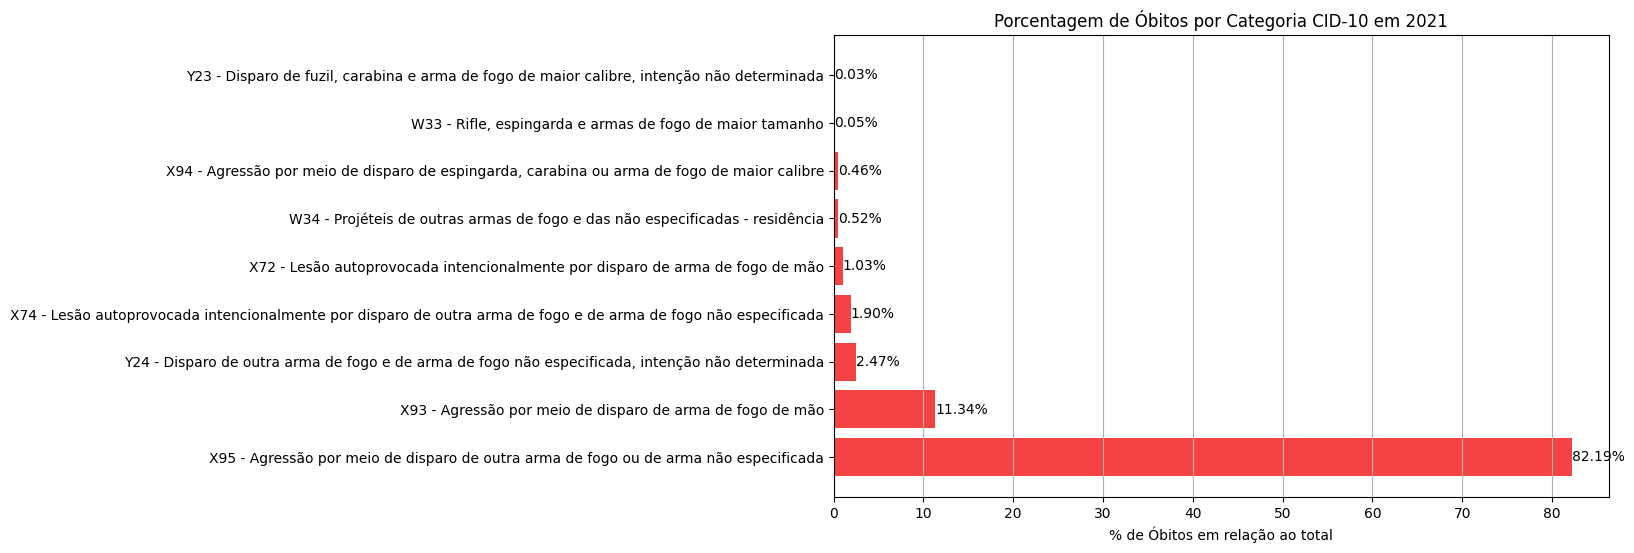

In [375]:
plot_categoria(categoria_2021, titulo='Porcentagem de Óbitos por Categoria CID-10 em 2021')

### Qual a região com maior número de óbitos por armas de fogo em 2021?


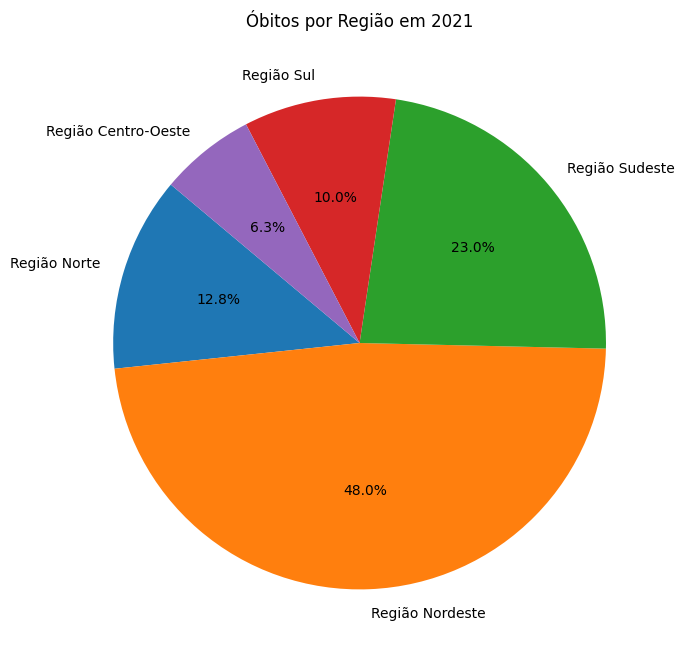

In [376]:
regiao_na_removed_total = regiao_na[regiao_na['Região'] != 'Total']

def create_pie_chart(df, title, labels, colors):
    plt.figure(figsize=(8, 8))
    if colors:
        plt.pie(df["Óbitos_p/Ocorrênc"], labels=df[labels], autopct='%1.1f%%', startangle=140, colors=colors)
    else:
        plt.pie(df["Óbitos_p/Ocorrênc"], labels=df[labels], autopct='%1.1f%%', startangle=140)

    plt.title(title)
    plt.show()

create_pie_chart(regiao_na_removed_total, 'Óbitos por Região em 2021', 'Região', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

### Qual a região com maior número de óbitos por armas de fogo desde 1996?


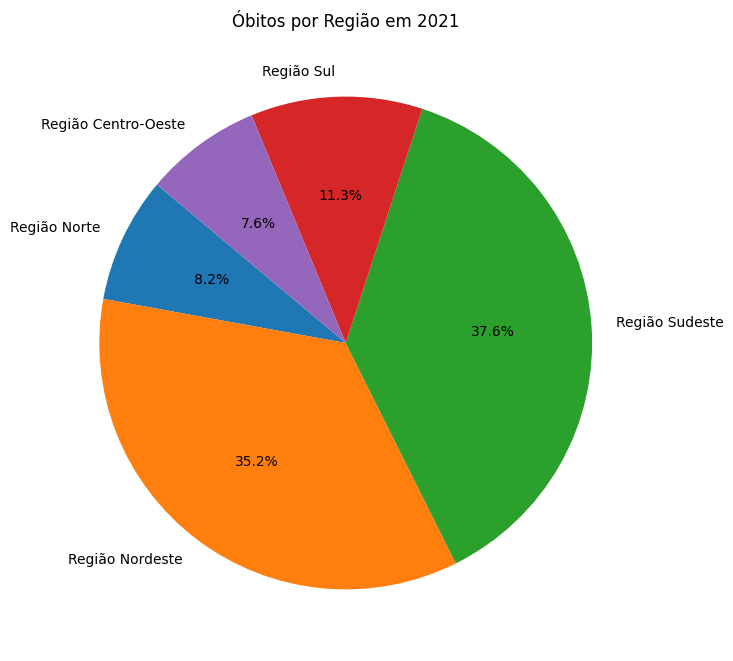

In [377]:
total_regiao_na = pd.read_csv(os.path.join(dataset_folder, 'TOTAL_REGIAO_NA.csv'))
total_regiao_na_to_plot = total_regiao_na[total_regiao_na['Região'] != 'Total']

cores_personalizadas = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
create_pie_chart(total_regiao_na_to_plot, 'Óbitos por Região em 2021', 'Região', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

### Como foi a porporção de mortes por região e por ano?

In [378]:
total_regiao_ano = pd.read_csv(os.path.join(dataset_folder, 'TOTAL_REGIAO_ANO.csv'))
total_regiao_ano

,Região,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
0,Região Norte,1219,1231,1444,1346,1341,1567,1642,1819,1936,...,3846,4172,4615,5304,5846,5900,4531,3877,4492,81290
1,Região Nordeste,5964,6700,7440,7195,7685,8546,8942,9542,9080,...,17636,19162,19011,20096,22672,19772,14961,17800,16862,347320
2,Região Sudeste,14161,14586,16040,17341,20010,20893,20888,21069,19260,...,12440,12507,11190,11773,11966,10362,8335,8204,8086,370542
3,Região Sul,2846,3014,2986,3001,3240,3521,3766,4096,4240,...,4609,5043,5216,5615,5476,4444,3566,3838,3510,111114
4,Região Centro-Oeste,2219,2168,2255,2217,2605,2463,2631,2670,2515,...,3951,4040,3877,3895,3569,3186,2651,2622,2202,75379
5,Total,26409,27699,30165,31100,34881,36990,37869,39196,37031,...,42482,44924,43909,46683,49529,43664,34044,36341,35152,985645


In [379]:
total_regiao_ano_to_plot = total_regiao_ano
total_regiao_ano_to_plot.drop('Total', axis=1, inplace=True)
total_regiao_ano_to_plot = total_regiao_ano_to_plot[total_regiao_ano['Região'] != 'Total']
total_regiao_ano_to_plot

,Região,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Região Norte,1219,1231,1444,1346,1341,1567,1642,1819,1936,...,3891,3846,4172,4615,5304,5846,5900,4531,3877,4492
1,Região Nordeste,5964,6700,7440,7195,7685,8546,8942,9542,9080,...,16954,17636,19162,19011,20096,22672,19772,14961,17800,16862
2,Região Sudeste,14161,14586,16040,17341,20010,20893,20888,21069,19260,...,12569,12440,12507,11190,11773,11966,10362,8335,8204,8086
3,Região Sul,2846,3014,2986,3001,3240,3521,3766,4096,4240,...,5081,4609,5043,5216,5615,5476,4444,3566,3838,3510
4,Região Centro-Oeste,2219,2168,2255,2217,2605,2463,2631,2670,2515,...,3814,3951,4040,3877,3895,3569,3186,2651,2622,2202


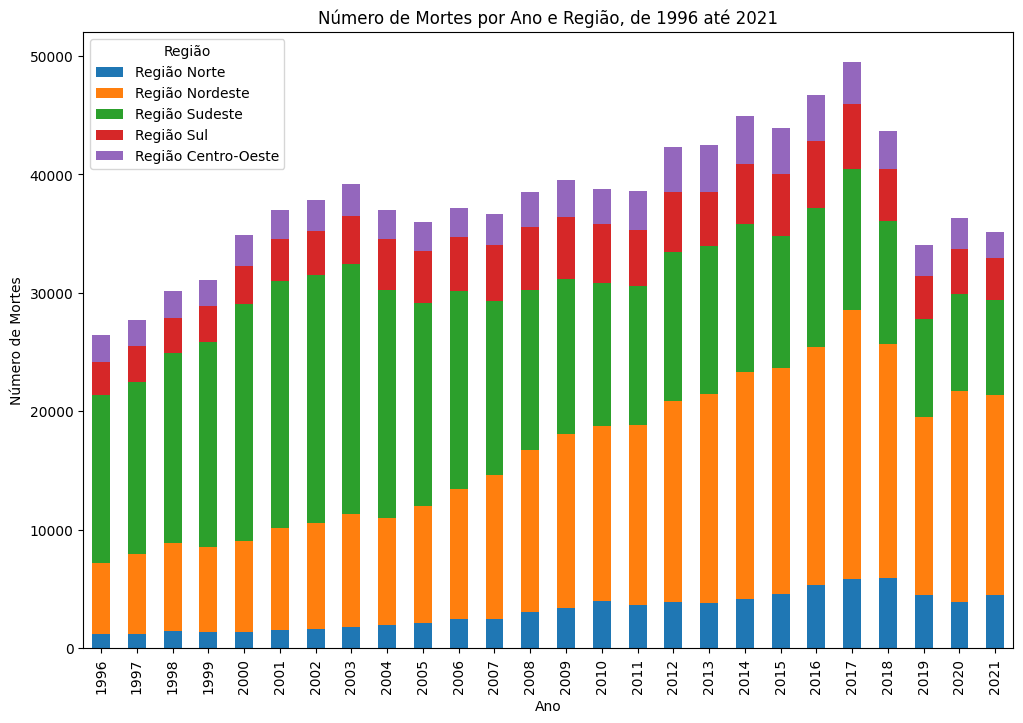

In [380]:
total_regiao_ano_to_plot = total_regiao_ano_to_plot.set_index("Região").T
ax = total_regiao_ano_to_plot.plot(kind="bar", stacked=True, figsize=(12, 8))
plt.xlabel("Ano")
plt.ylabel("Número de Mortes")
plt.title("Número de Mortes por Ano e Região, de 1996 até 2021")

plt.show()

### Qual o sexo que mais morre por armas de fogo desde 1996?

In [381]:
total_sexo_ocorrencia = pd.read_csv(os.path.join(dataset_folder, 'TOTAL-SEXO-OCORRENCIA.csv'))
total_sexo_ocorrencia

,Sexo,Óbitos_p/Ocorrênc
0,Masc,857839
1,Fem,54520


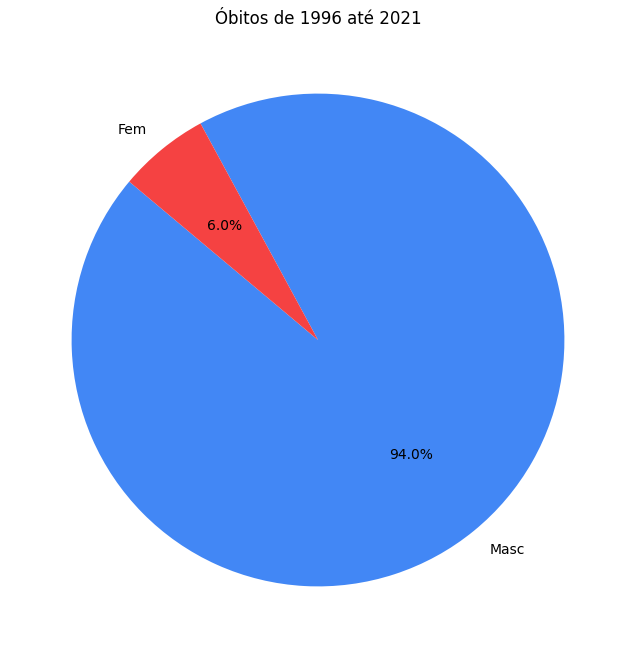

In [382]:
create_pie_chart(total_sexo_ocorrencia, "Óbitos de 1996 até 2021", "Sexo", colors=["#4287f5", "#f54242"])

### Qual o sexo que mais morreu por armas de fogo em 2021?

In [383]:
sexo_ocorrencia_2021 = pd.read_csv(os.path.join(dataset_folder, '2021-SEXO-OCORRENCIA.csv'))
sexo_ocorrencia_2021

,Sexo,Óbitos_p/Ocorrênc
0,Masc,31294
1,Fem,2082


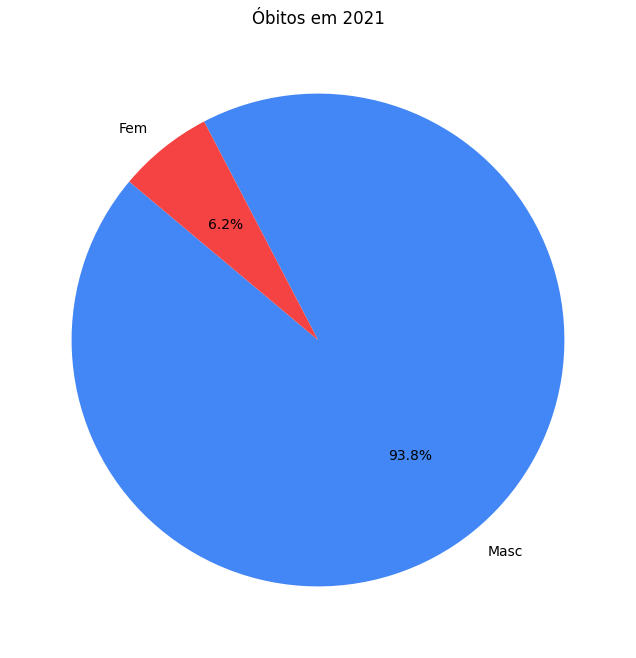

In [384]:
create_pie_chart(sexo_ocorrencia_2021, "Óbitos em 2021", "Sexo", colors=["#4287f5", "#f54242"])

### Como é a distribuição de óbitos por faixa etária e sexo desde 1996?

In [385]:
total_sexo_faixa_etaria = pd.read_csv(os.path.join(dataset_folder, 'TOTAL_SEXO_FAIXA_ETARIA.csv'))
total_sexo_faixa_etaria.drop(columns=['Total', 'Idade ignorada'], inplace=True)
total_sexo_faixa_etaria

,Sexo,Menor 1 ano,1 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos,80 anos e mais
0,Masc,231,596,1130,9288,159882,381569,197349,91794,40615,16852,6205,2151
1,Fem,96,420,570,2248,9924,19567,13765,7750,3458,1445,602,228


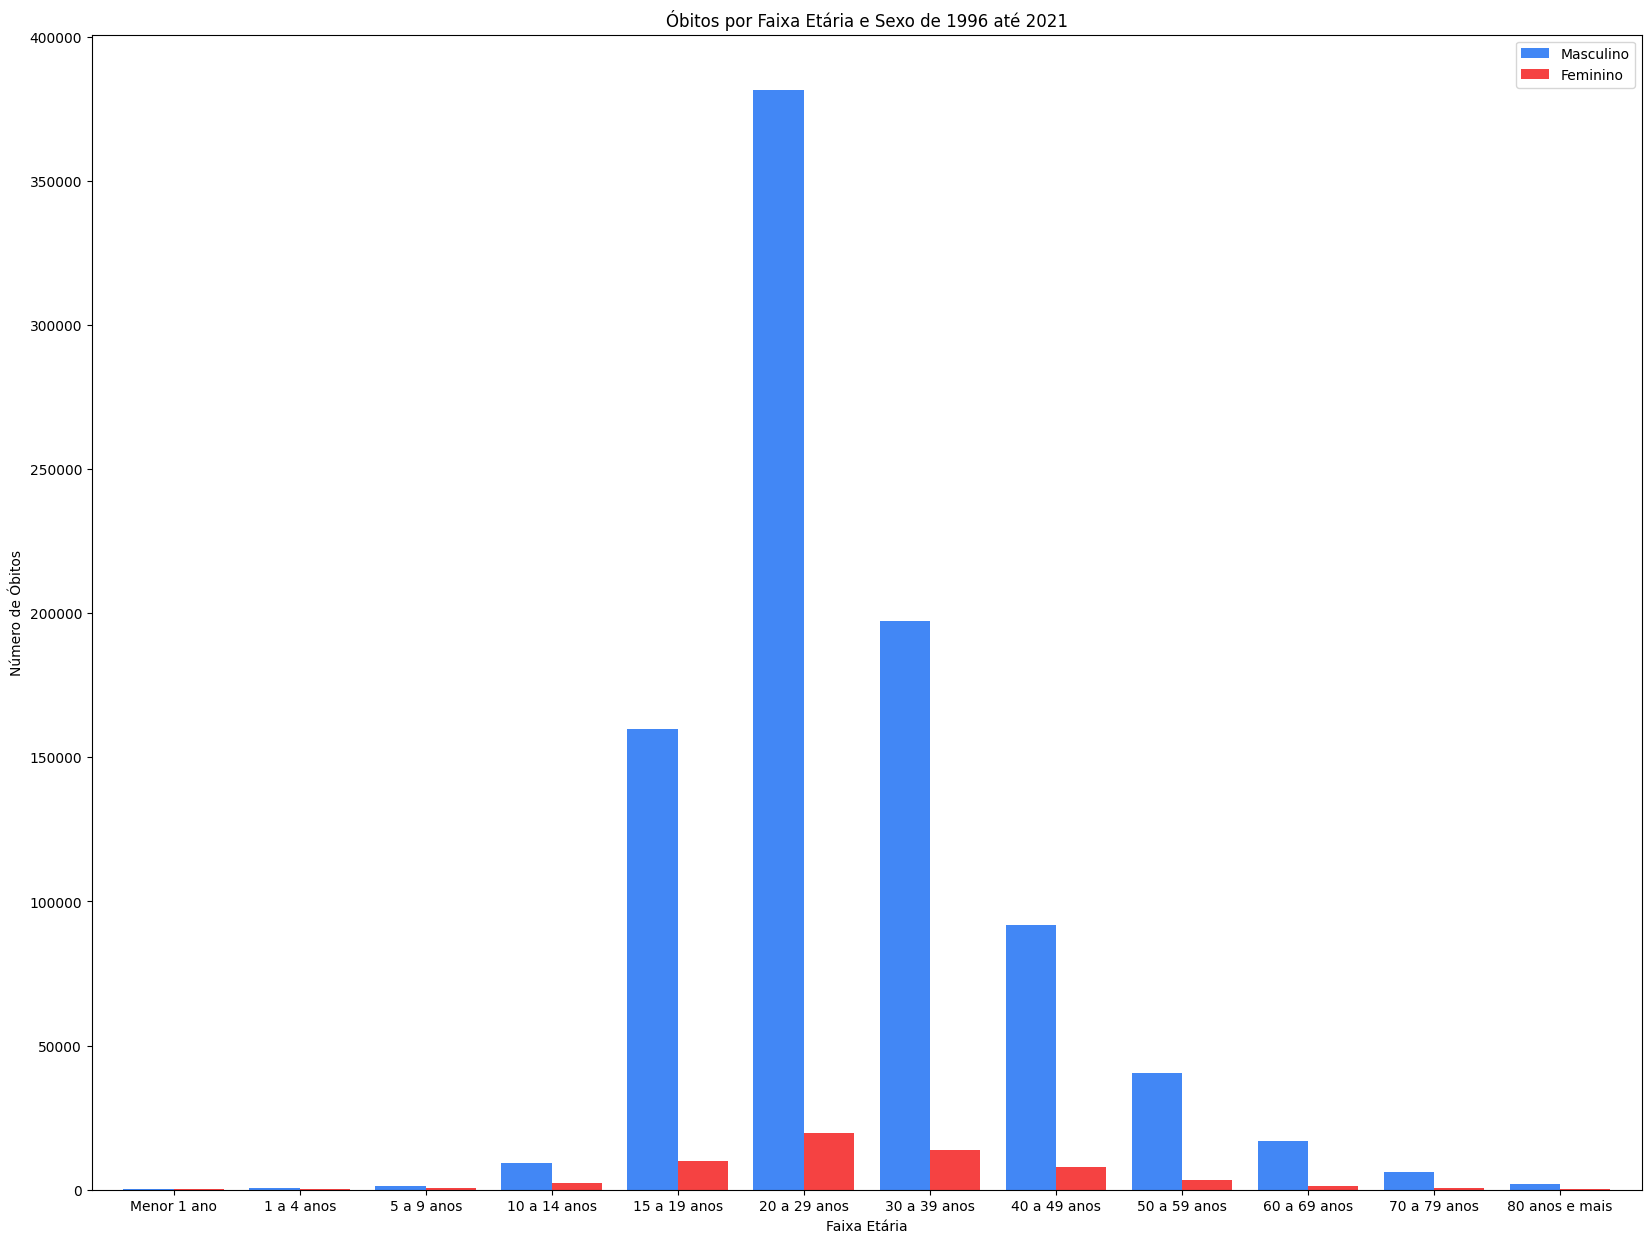

In [386]:
def plot_bar_faixa_etaria(df, title, index, x_label, y_label, legend=["Masculino", "Feminino"], colors=["#4287f5", "#f54242"], fig_size=(20, 15)):
    df = df.set_index(index).T

    ax = df.plot(kind="bar", color=["#4287f5", "#f54242"], width=0.8, figsize=fig_size)

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.legend(legend)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

    plt.show()

plot_bar_faixa_etaria(total_sexo_faixa_etaria, "Óbitos por Faixa Etária e Sexo de 1996 até 2021", "Sexo", "Faixa Etária", "Número de Óbitos")

### Em 2021, como foi a distribuição de óbitos por Faixa Etária e Sexo?

In [387]:
sexo_faixa_etaria_2021 = pd.read_csv(os.path.join(dataset_folder, '2021-SEXO-FAIXA-ETARIA-OCORRENCIA.csv'))
drop_and_replace(sexo_faixa_etaria_2021, 'Idade ignorada')
sexo_faixa_etaria_2021.drop(columns=['Total'], inplace=True)
sexo_faixa_etaria_2021

,Sexo,Menor 1 ano,1 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos,80 anos e mais
0,Masc,5,14,12,177,4386,13288,7346,3472,1447,532,164,41
1,Fem,2,10,12,47,259,611,506,259,126,52,17,3


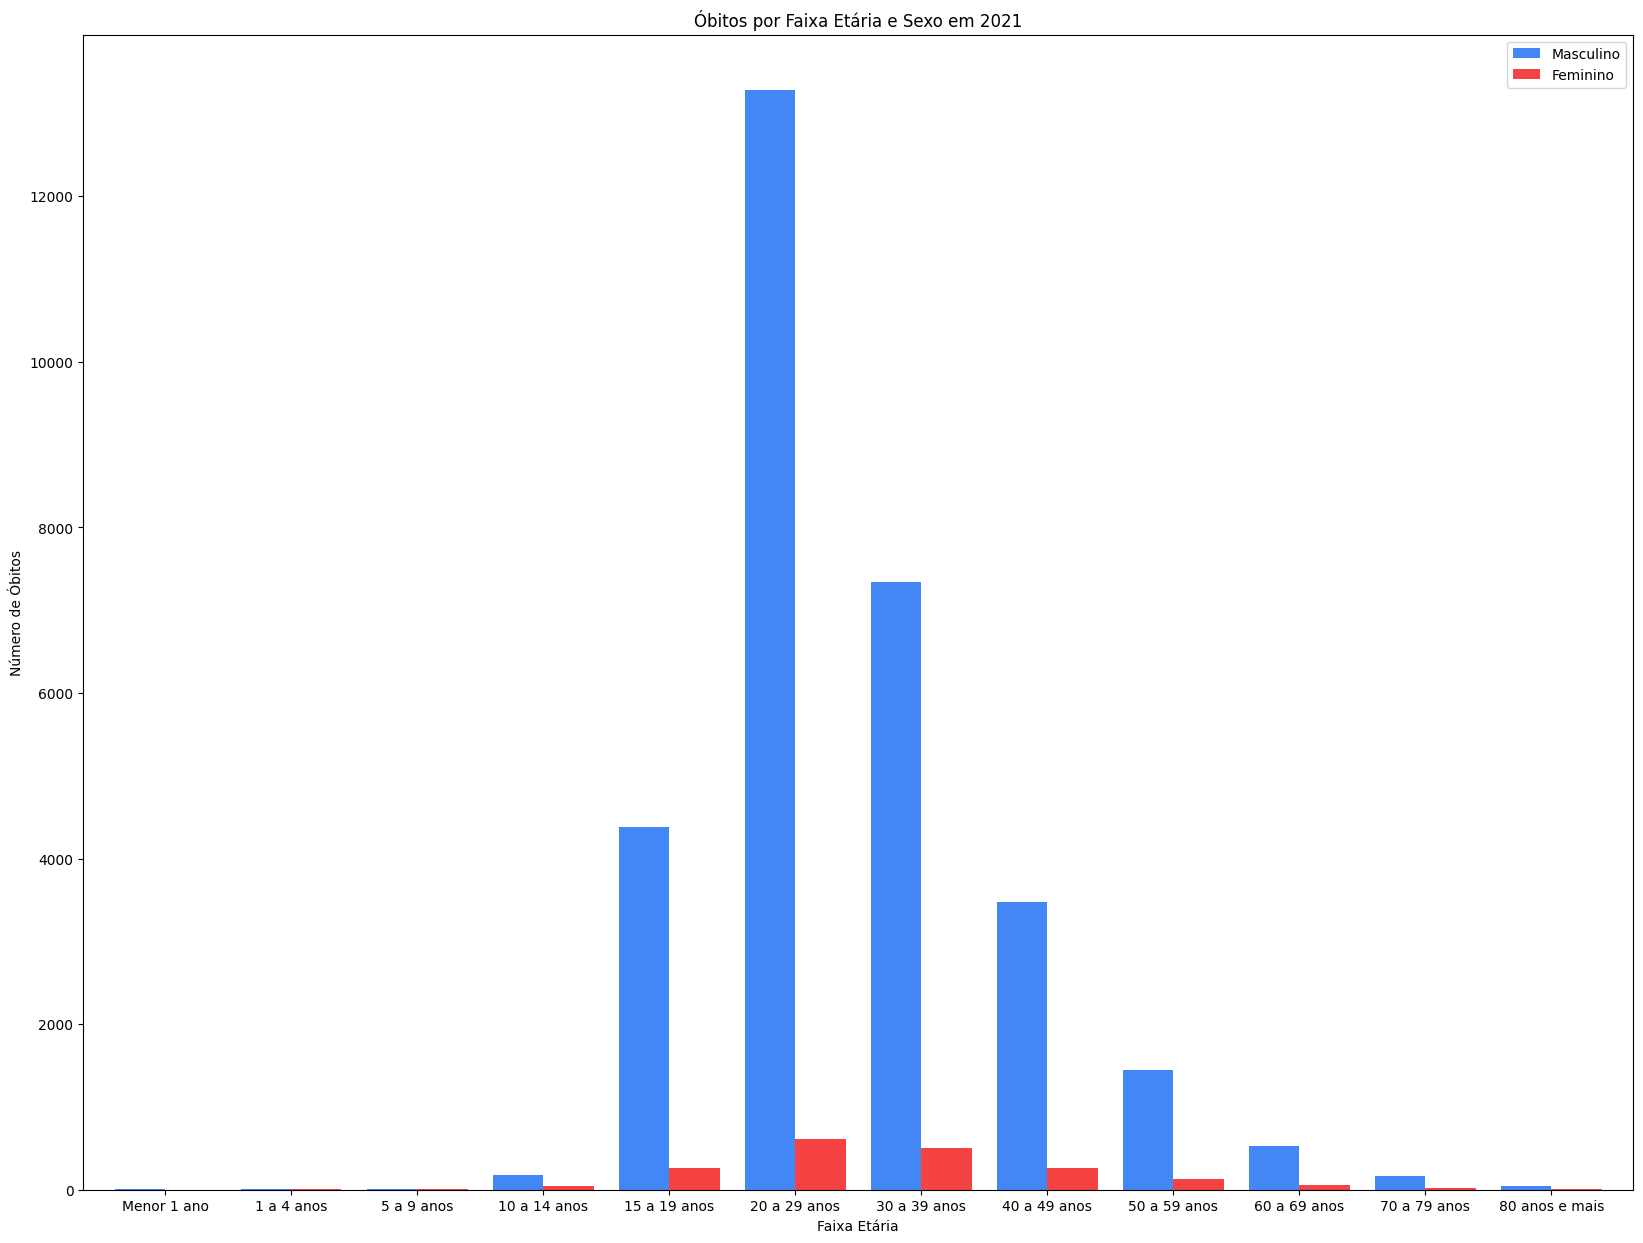

In [388]:
plot_bar_faixa_etaria(sexo_faixa_etaria_2021, "Óbitos por Faixa Etária e Sexo em 2021", "Sexo", "Faixa Etária", "Número de Óbitos")

### Óbitos por Cor/Raça

In [389]:
total_cor_raca = pd.read_csv(os.path.join(dataset_folder, 'TOTAL-COR-RACA-OCORRENCIA.csv'))
total_cor_raca = total_cor_raca[total_cor_raca['Cor/Raça'] != 'Ignorado']
total_cor_raca = total_cor_raca[total_cor_raca['Cor/Raça'] != 'Total']
total_cor_raca

,Cor/Raça,Óbitos_p/Ocorrênc
0,Branca,270267
1,Preta,75506
2,Amarela,2393
3,Parda,535162
4,Indígena,1384


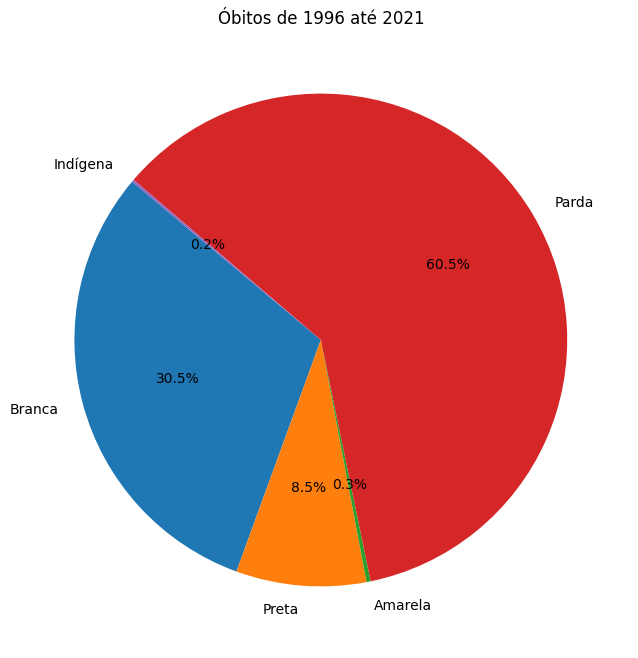

In [390]:
create_pie_chart(total_cor_raca, "Óbitos de 1996 até 2021", "Cor/Raça", colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

### Qual é o estado que tem mais óbitos por armas de fogo desde 1996?

In [391]:
total_estado = pd.read_csv(os.path.join(dataset_folder, 'TOTAL_ESTADO_OCORRENCIA.csv'))
total_estado

,Estado,Óbitos
0,Rondônia,8520
1,Acre,2677
2,Amazonas,14488
3,Roraima,1459
4,Pará,42910
5,Amapá,2971
6,Tocantins,4009
7,Maranhão,20734
8,Piauí,6362
9,Ceará,49949


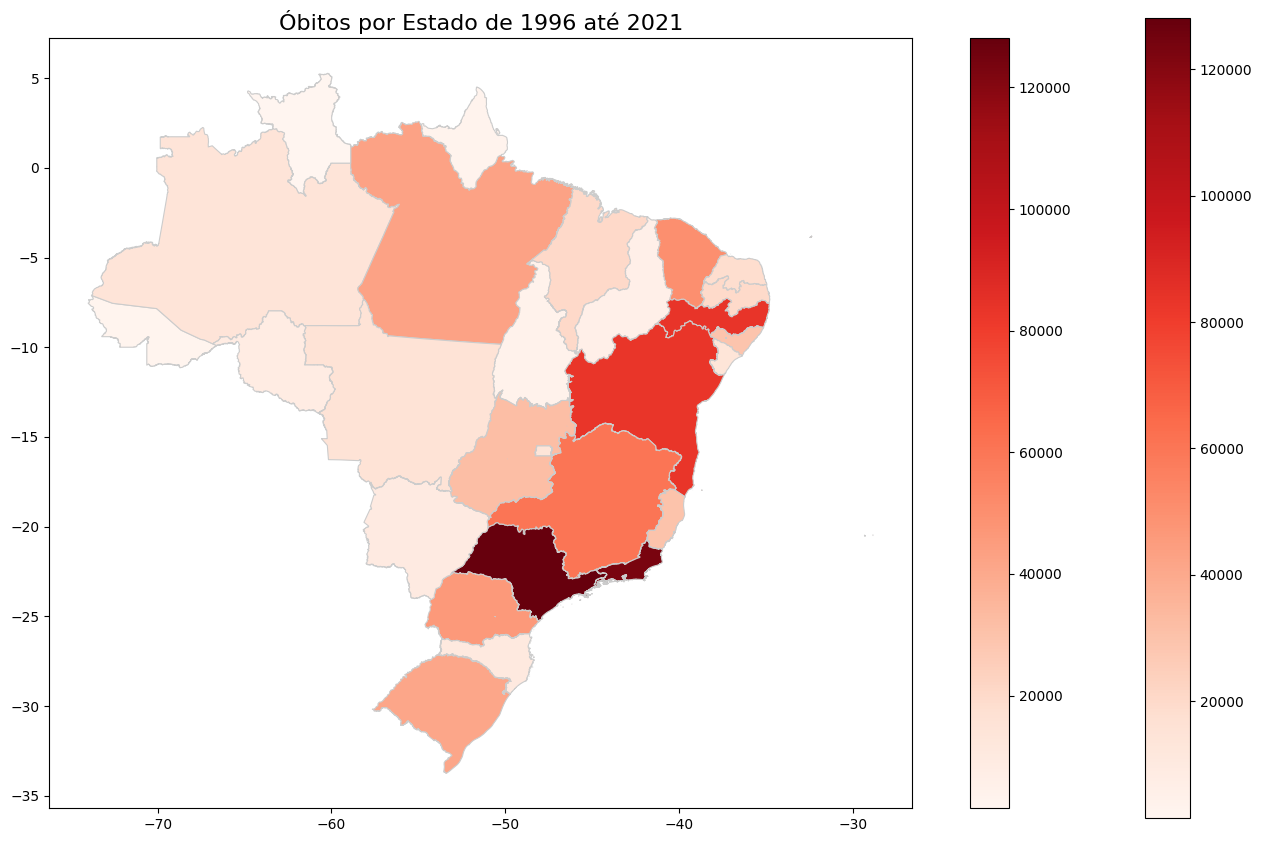

In [392]:
def plot_map(df, titulo, column='Óbitos'):
    shapefile_path = 'assets/BR_UF_2022.shp'  # Substitua pelo caminho do seu arquivo shapefile
    brasil = gpd.read_file(shapefile_path)

    mapa = brasil.merge(df, left_on='NM_UF', right_on='Estado')

    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    mapa.plot(column=column, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    plt.title(titulo, fontsize=16)

    cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
    sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=mapa[column].min(), vmax=mapa[column].max()))
    sm._A = []
    fig.colorbar(sm, cax=cax)

    plt.show()

plot_map(total_estado, 'Óbitos por Estado de 1996 até 2021')

### Qual é o estado que tem mais óbitos por armas de fogo atualmente (2021)?

In [393]:
estado_2021 = pd.read_csv(os.path.join(dataset_folder, '2021-ESTADO-OCORRENCIA.csv'))
estado_2021

,Estado,Óbitos
0,Rondônia,345
1,Acre,123
2,Amazonas,1298
3,Roraima,108
4,Pará,2039
5,Amapá,315
6,Tocantins,264
7,Maranhão,1485
8,Piauí,595
9,Ceará,3059


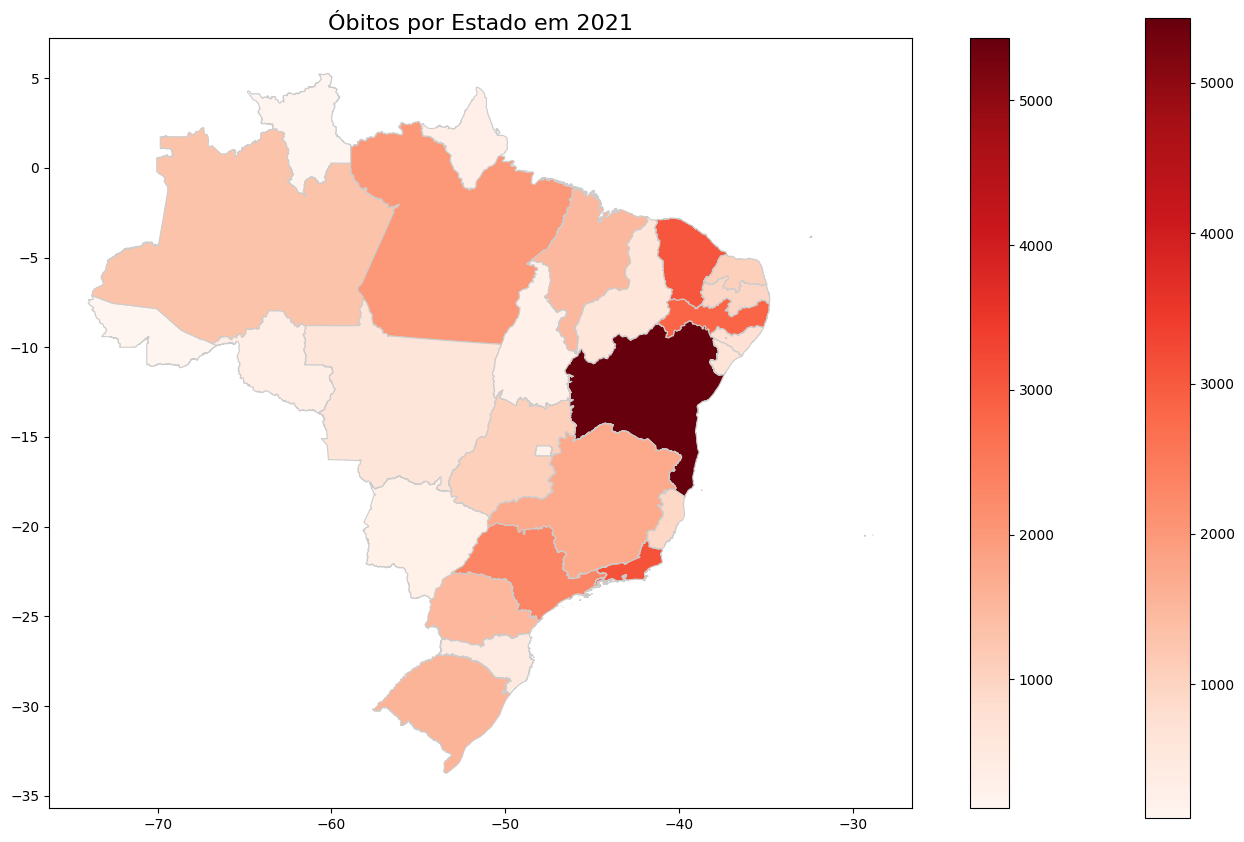

In [394]:
plot_map(estado_2021, 'Óbitos por Estado em 2021')

## Analisando as Categorias X72 e X74
As categorias X72 e X74, segundo o Glossário do Atlas da Violência, dizem respeito à Suicídios por Armas de Fogo.


Disponível em: https://www.ipea.gov.br/atlasviolencia/quem/5/glossario

### Será que houve aumento nos casos de suicídio por armas de fogo durante a pandemia?

In [395]:
parcial_ano_suicidio = pd.read_csv(os.path.join(dataset_folder, 'PARCIAL-ANO-SUICIDIO-OCORRENCIA.csv'))
parcial_ano_suicidio

,Ano do Óbito,Óbitos_p/Ocorrênc
0,2018,941
1,2019,927
2,2020,935
3,2021,1031
4,Total,3834


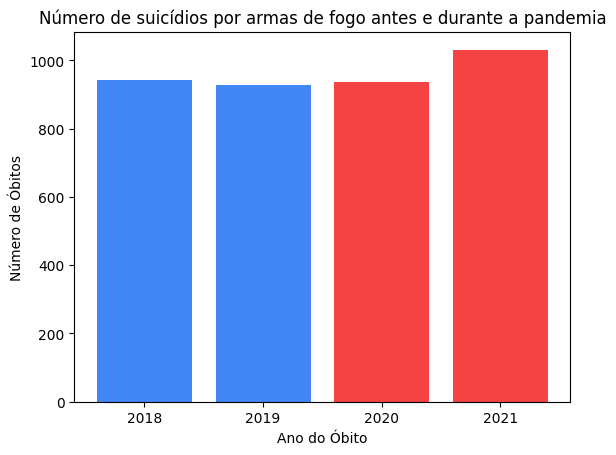

In [396]:
parcial_ano_suicidio_plot = parcial_ano_suicidio[parcial_ano_suicidio["Ano do Óbito"] != "Total"]

colors = {'2018': '#4287f5', '2019': '#4287f5', '2020': '#f54242', '2021': '#f54242'}
plt.bar(parcial_ano_suicidio_plot["Ano do Óbito"], parcial_ano_suicidio_plot["Óbitos_p/Ocorrênc"], color=[colors[ano] for ano in parcial_ano_suicidio_plot["Ano do Óbito"]])

plt.xlabel('Ano do Óbito')
plt.ylabel('Número de Óbitos')
plt.title('Número de suicídios por armas de fogo antes e durante a pandemia')

plt.show()

### Qual o estado com maior número de suicídios por arma de fogo?

In [397]:
total_estado_suicidio = pd.read_csv(os.path.join(dataset_folder, 'TOTAL-ESTADO-SUICIDIO-OCORRENCIA.csv'))
total_estado_suicidio

,Estado,Óbitos
0,Rondônia,268
1,Acre,120
2,Amazonas,255
3,Roraima,46
4,Pará,586
5,Amapá,45
6,Tocantins,258
7,Maranhão,504
8,Piauí,436
9,Ceará,749


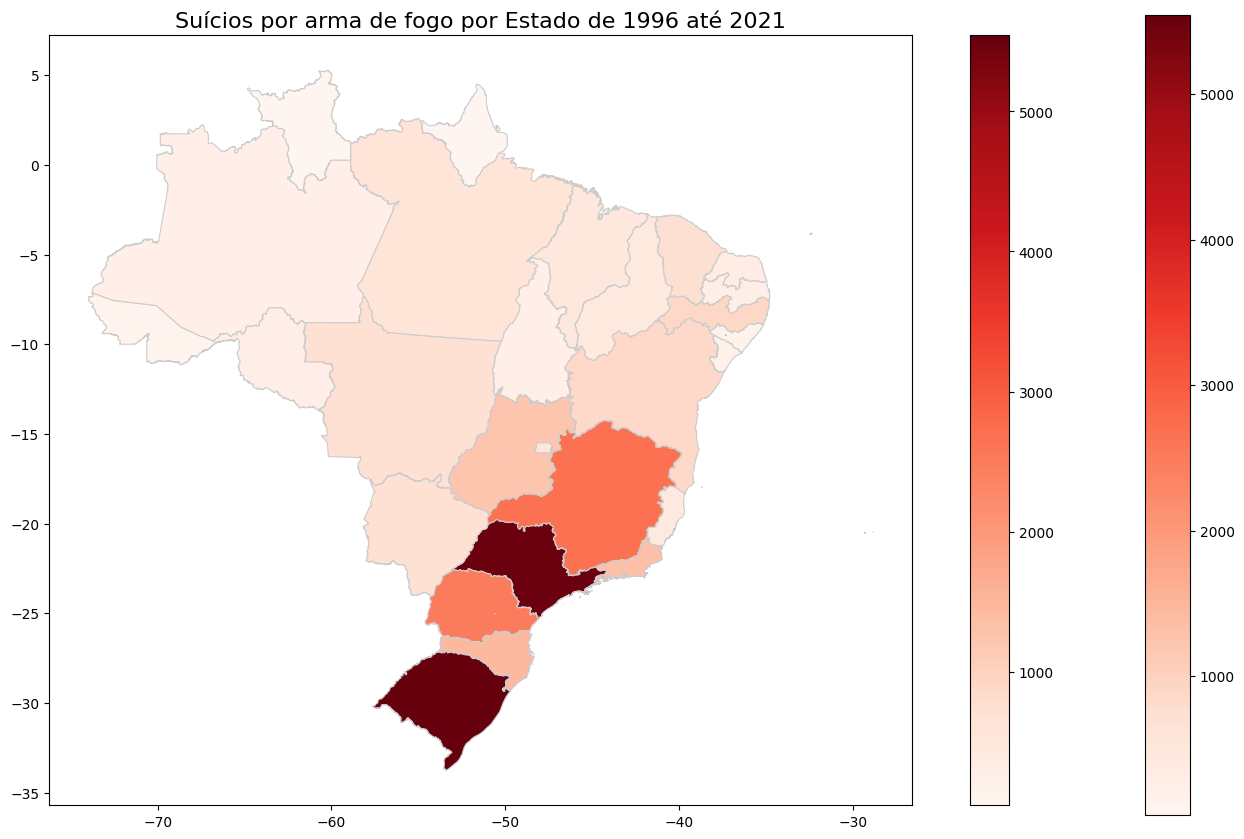

In [398]:
plot_map(total_estado_suicidio, 'Suícios por arma de fogo por Estado de 1996 até 2021')

### Como é a distribuição de suicídio por armas de fogo e por faixa etária entre homens no período entre 2017 e 2021?


In [399]:
parcial_sexo_faixa_etaria_rs = pd.read_csv(os.path.join(dataset_folder, 'PARCIAL-SEXO-FAIXA-ETARIA-RS-OCORRENCIA.csv'))
parcial_sexo_faixa_etaria_rs

,Sexo,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos,80 anos e mais,Total
0,Masc,1,3,37,87,97,101,133,120,81,55,715
1,Fem,-,3,9,10,14,21,17,10,6,4,94


In [400]:
parcial_sexo_faixa_etaria_rs.replace('-', 0, inplace=True)
parcial_sexo_faixa_etaria_rs.drop(columns=['Total'], inplace=True)

parcial_sexo_faixa_etaria_rs

,Sexo,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos,80 anos e mais
0,Masc,1,3,37,87,97,101,133,120,81,55
1,Fem,0,3,9,10,14,21,17,10,6,4


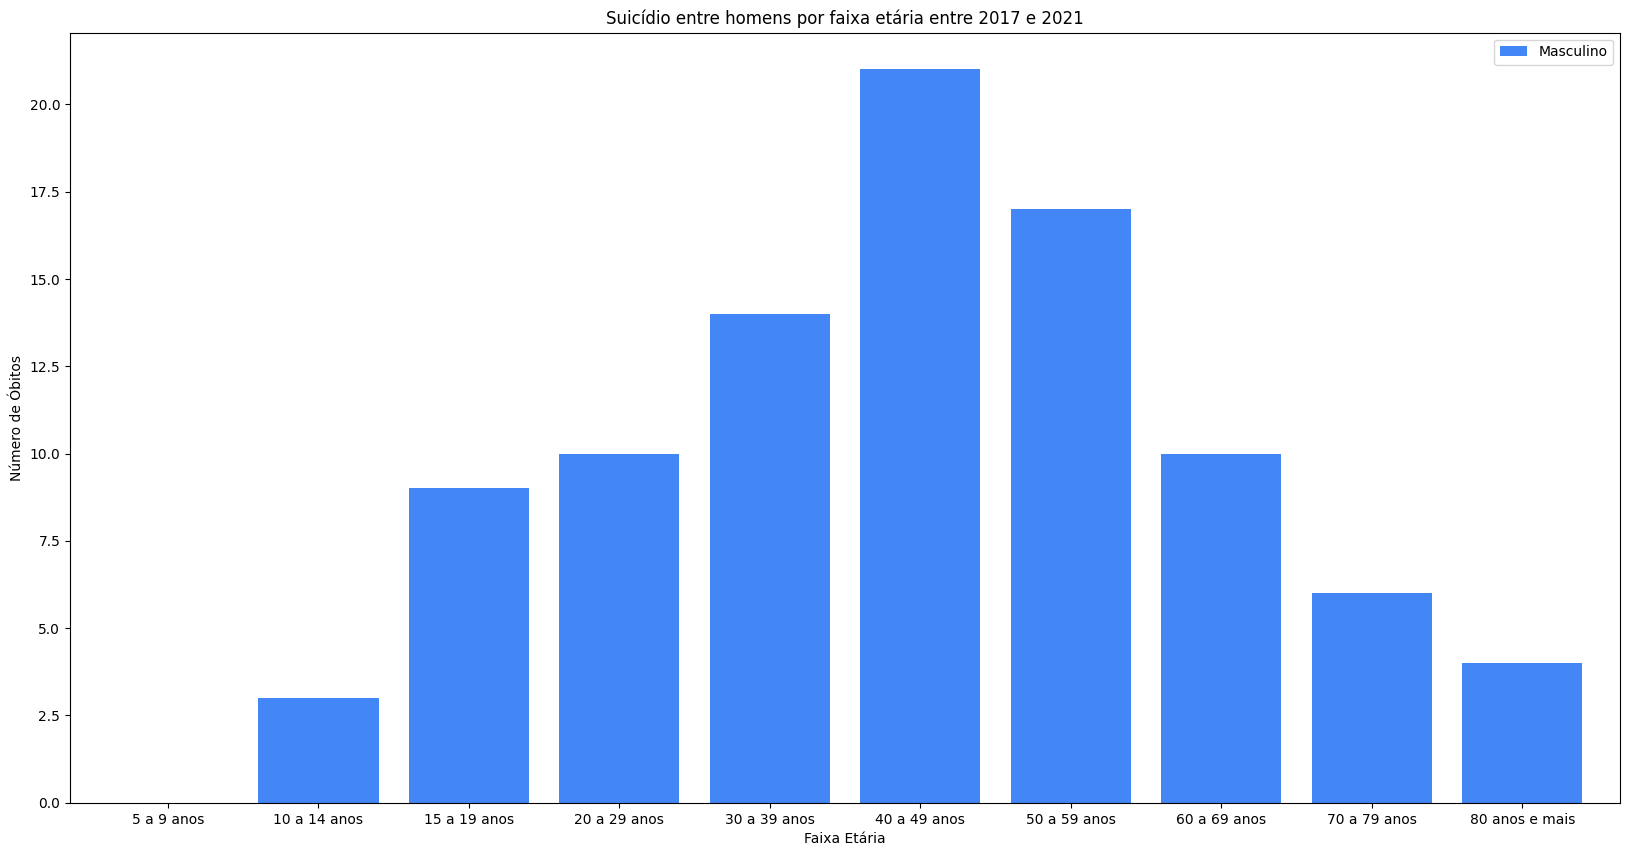

In [401]:
plot_bar_faixa_etaria(parcial_sexo_faixa_etaria_rs, "Suicídio entre homens por faixa etária entre 2017 e 2021", "Sexo", "Faixa Etária", "Número de Óbitos", fig_size=(20,10))

## Analisando as Categorias X93-X95
As categorias X93-X95, segundo o Glossário do Atlas da Violência, dizem respeito à Homicídios por Armas de Fogo.


Disponível em: https://www.ipea.gov.br/atlasviolencia/quem/5/glossario

In [402]:
total_estado_homicidio = pd.read_csv(os.path.join(dataset_folder, 'TOTAL-ESTADO-HOMICIDIOS-OCORRENCIA.csv'))
total_estado_homicidio

,Unidade da Federação,Óbitos_p/Ocorrência
0,Rondônia,1516
1,Acre,1253
2,Amazonas,4965
3,Roraima,567
4,Pará,13053
5,Amapá,1182
6,Tocantins,1401
7,Maranhão,6657
8,Piauí,2144
9,Ceará,17200


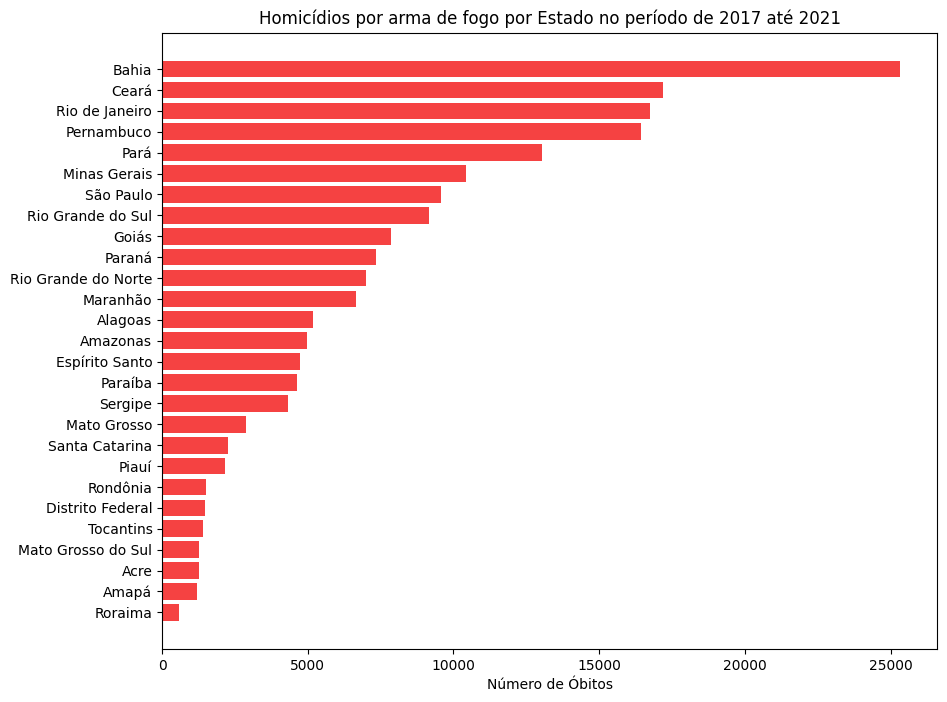

In [403]:

total_estado_homicidio = total_estado_homicidio[total_estado_homicidio['Unidade da Federação'] != 'Total']
total_estado_homicidio = total_estado_homicidio.sort_values(by="Óbitos_p/Ocorrência", ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(total_estado_homicidio["Unidade da Federação"], total_estado_homicidio["Óbitos_p/Ocorrência"], color='#f54242')
plt.xlabel('Número de Óbitos')
plt.title('Homicídios por arma de fogo por Estado no período de 2017 até 2021')
plt.show()

### Relação entre número de armas de fogo registradas por estado versus número de homicídios por armas de fogo por estado (2020 e 2021)
Os dados sobre o número de registro de armas de fogo por estado nos anos de 2020 e 2021 foram retirados de uma matéria do site g1.

Disponível em: https://g1.globo.com/sp/sao-paulo/noticia/2022/06/28/licencas-para-armas-crescem-quase-cinco-vezes-no-governo-bolsonaro-exercito-tem-674-mil-autorizacoes-ativas-mostra-anuario.ghtml


In [404]:
g1_registro_armas = pd.read_csv(os.path.join(dataset_folder, 'G1-REGISTRO-ARMAS.csv'))
g1_registro_armas['Óbitos'] = g1_registro_armas['2020'] + g1_registro_armas['2021']
g1_registro_armas

,Estado,2020,2021,Óbitos
0,Acre,12931,15778,28709
1,Alagoas,16239,18245,34484
2,Amapá,5502,6076,11578
3,Amazonas,10217,11805,22022
4,Bahia,41416,48471,89887
5,Ceará,21504,25316,46820
6,Distrito Federal,232859,243806,476665
7,Espírito Santo,29227,41106,70333
8,Goiás,53551,64137,117688
9,Maranhão,17029,22119,39148


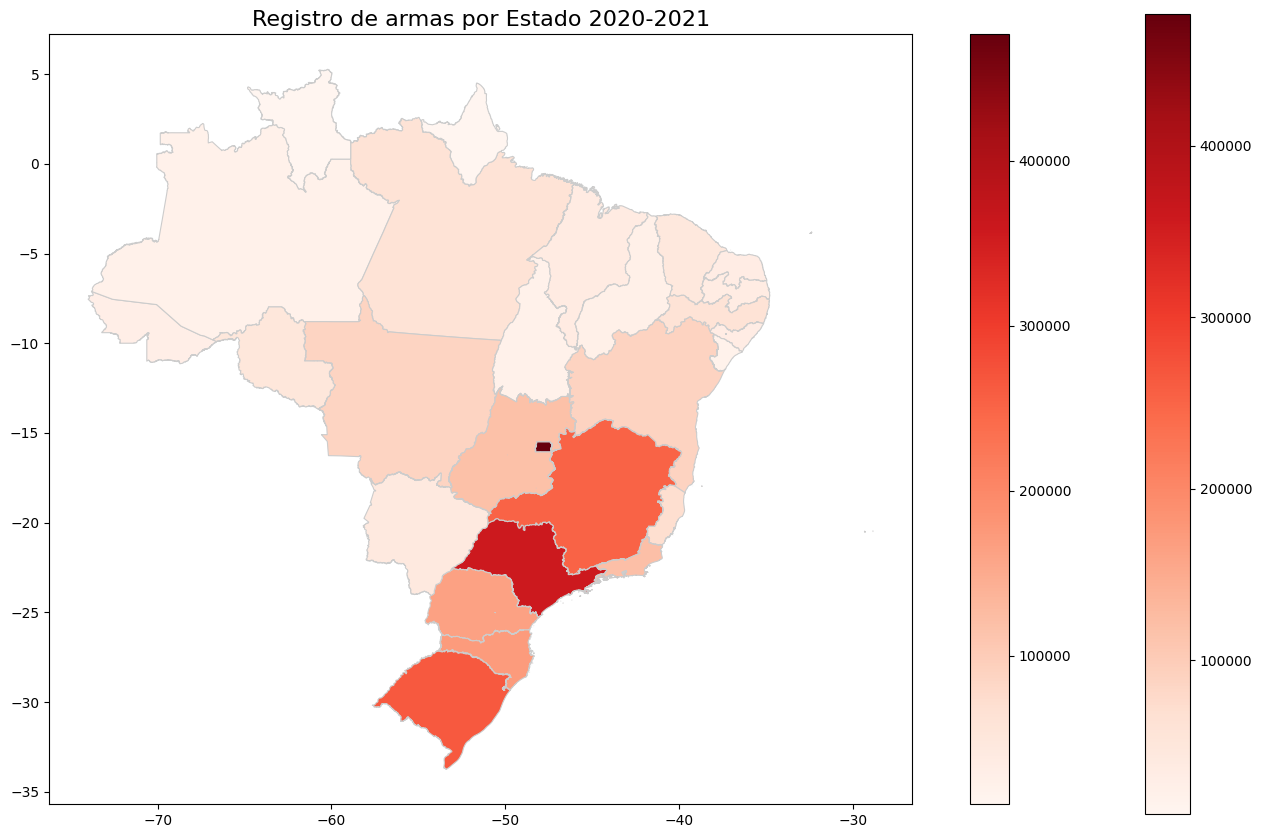

In [405]:
plot_map(g1_registro_armas, 'Registro de armas por Estado 2020-2021', column='Óbitos')

In [406]:
estado_homicidio_2020 = pd.read_csv(os.path.join(dataset_folder, '2020-2021-ESTADO-HOMICIDIOS-OCORRENCIA.csv'))
estado_homicidio_2020

,Estado,Óbitos
0,Rondônia,580
1,Acre,343
2,Amazonas,2060
3,Roraima,206
4,Pará,3858
5,Amapá,533
6,Tocantins,526
7,Maranhão,2865
8,Piauí,1022
9,Ceará,6400


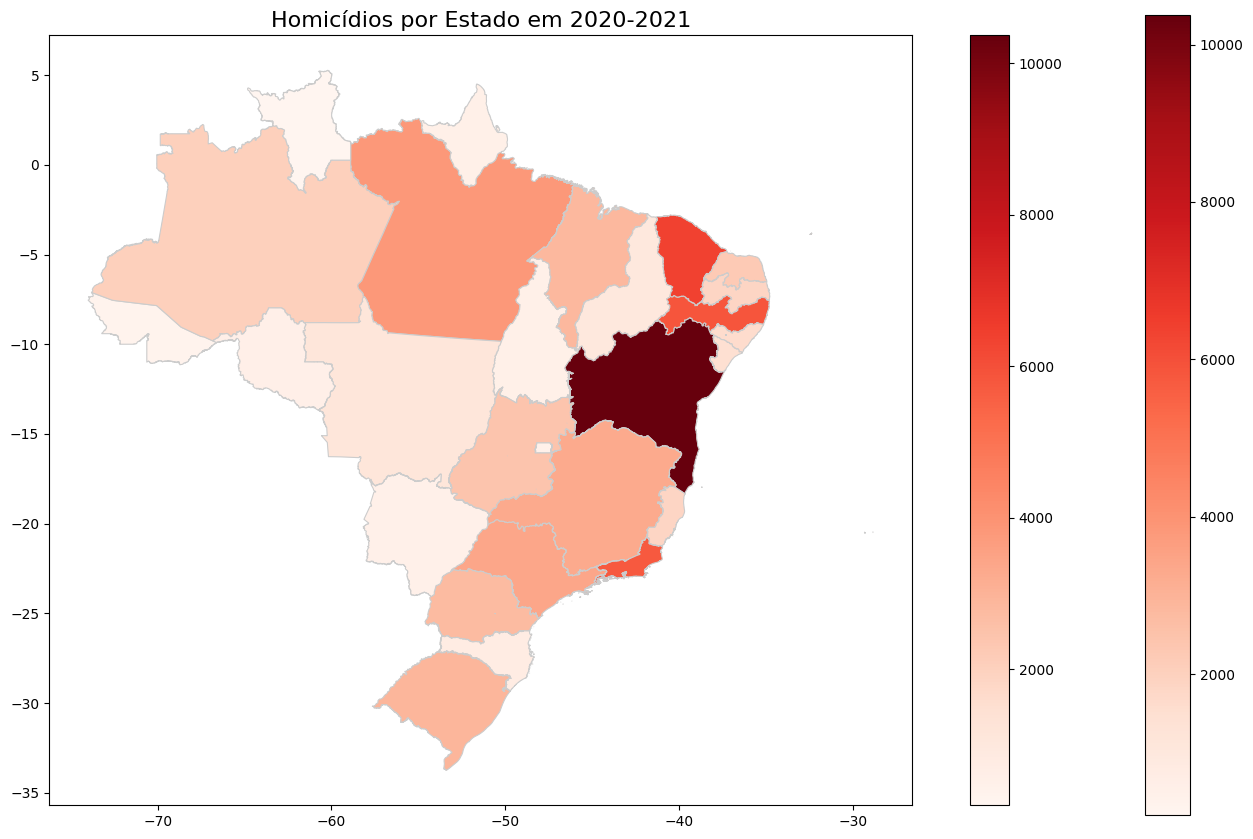

In [407]:
plot_map(estado_homicidio_2020, 'Homicídios por Estado em 2020-2021')

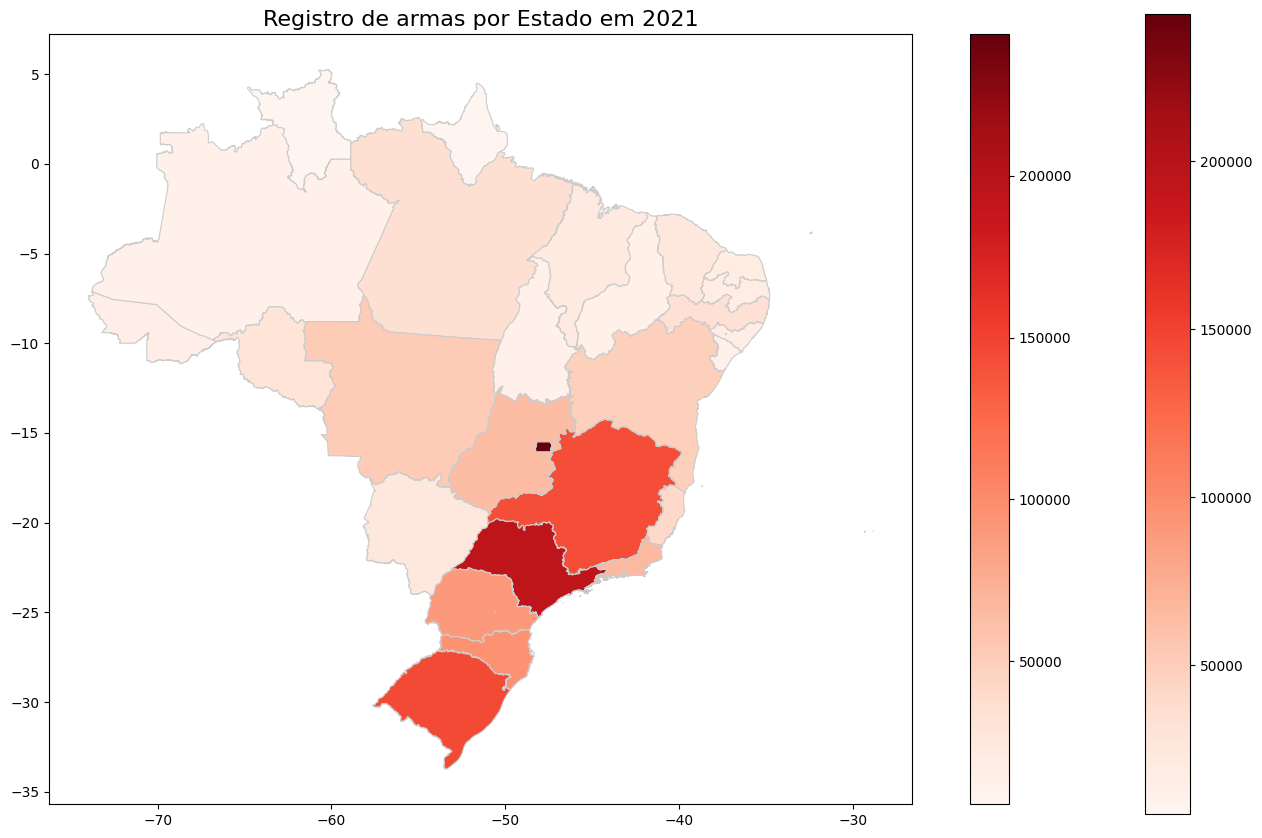

In [408]:
plot_map(g1_registro_armas, 'Registro de armas por Estado em 2021', column='2021')